## Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('Churn_Modelling_1.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Exploratory Data Analysis

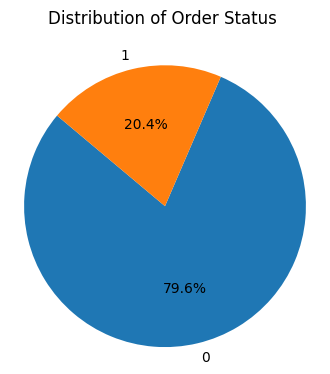

In [6]:
plt.figure(figsize=(4,4))
output_counts = df['Exited'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Order Status \n')
plt.ylabel('')

plt.show()

#### Observation:
    
The target column looks imbalanced - accuracy would not be a good metric to evaluate the model and we would need to apply balancing techniques like SMOTE while modeling

Box plot for numerical features:


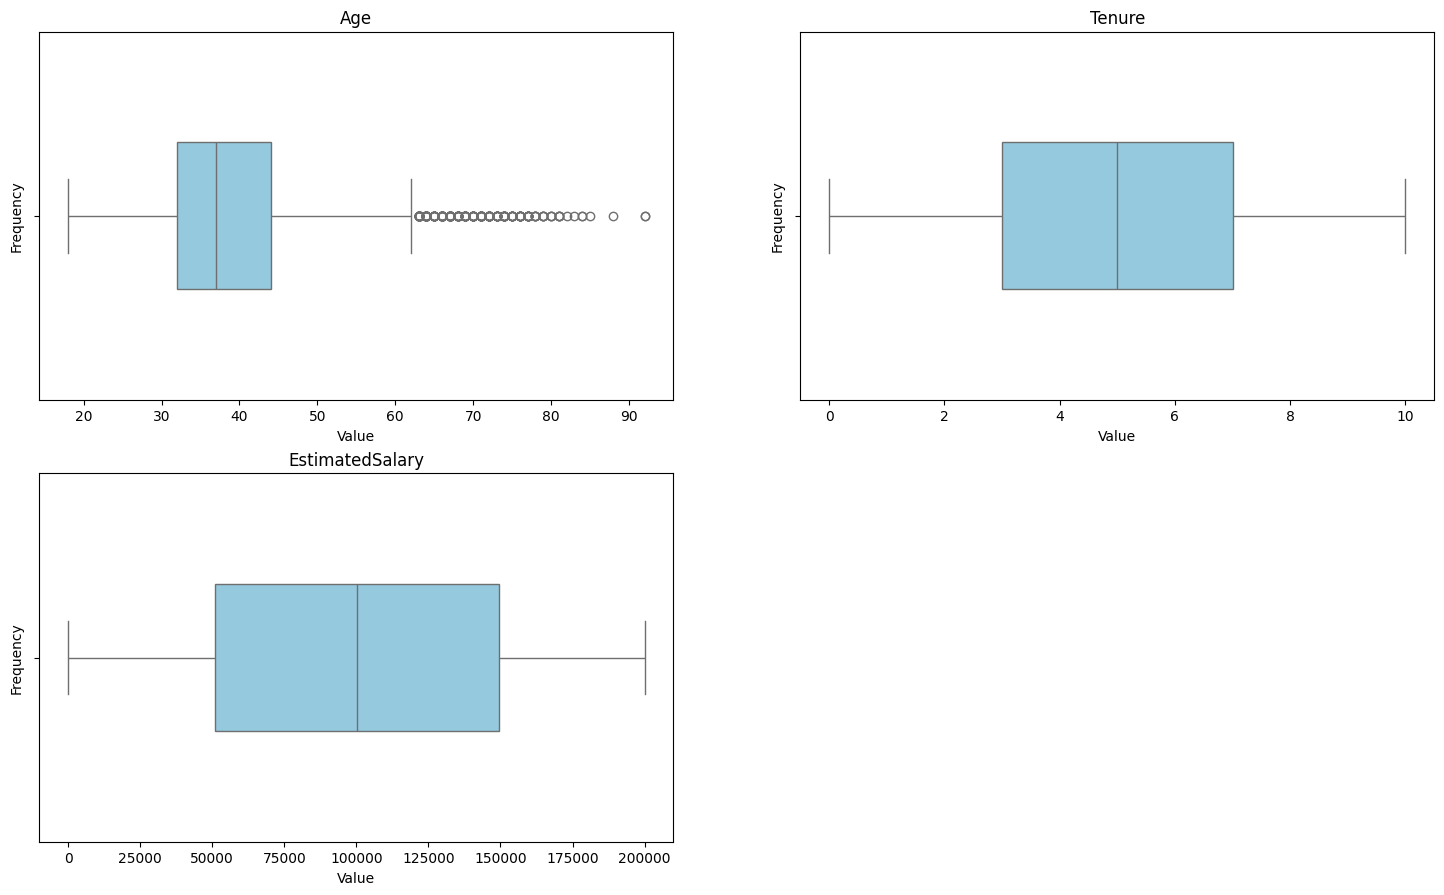

In [7]:
print("Box plot for numerical features:")
plt.figure(figsize=(18,22))
numeric_features = ['Age','Tenure','EstimatedSalary']
for i, column in enumerate(numeric_features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=df[column], color='skyblue', width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

#### Observation:
    
It does not look like there are many outliers in the numerical features, except Age - but we can't do much about it

Count plot for categorical features:


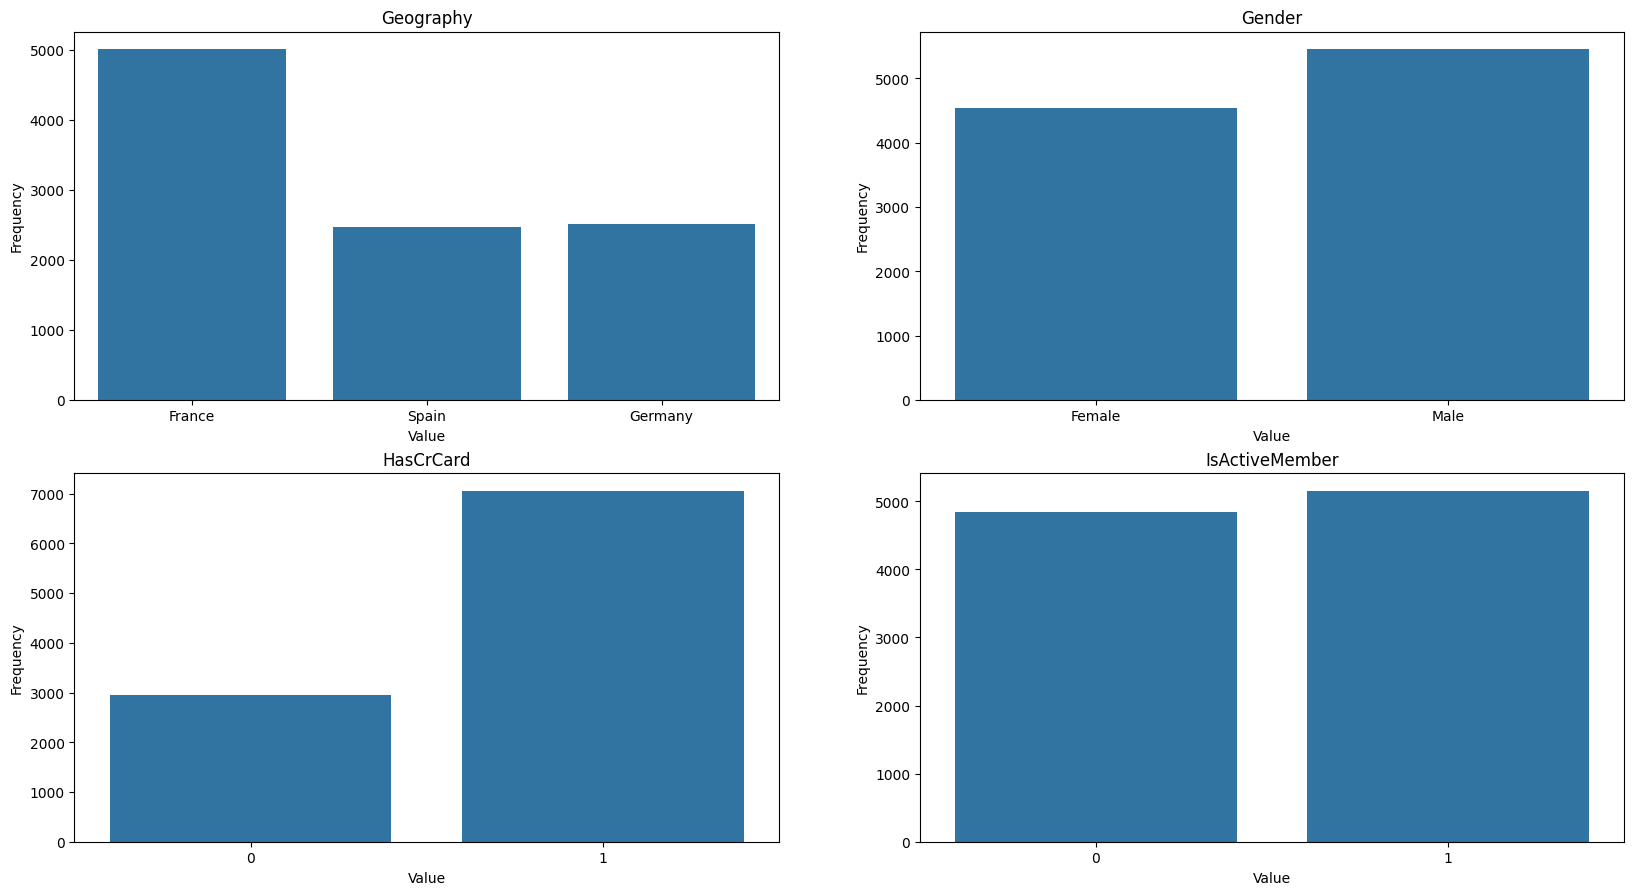

In [8]:
print("Count plot for categorical features:")
plt.figure(figsize=(20,22))

for i, column in enumerate(['Geography','Gender','HasCrCard','IsActiveMember']):
    plt.subplot(4,2,i + 1)
    sns.countplot(x= df[column], data=df)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

In [9]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

#### Observation:
    
The count plots indicate that there are more customers from France than Spain or Germany, the gender distribution is nearly balanced, most customers have a credit card, and there is a higher proportion of active members

Observing independent variables based on the Exited Column:


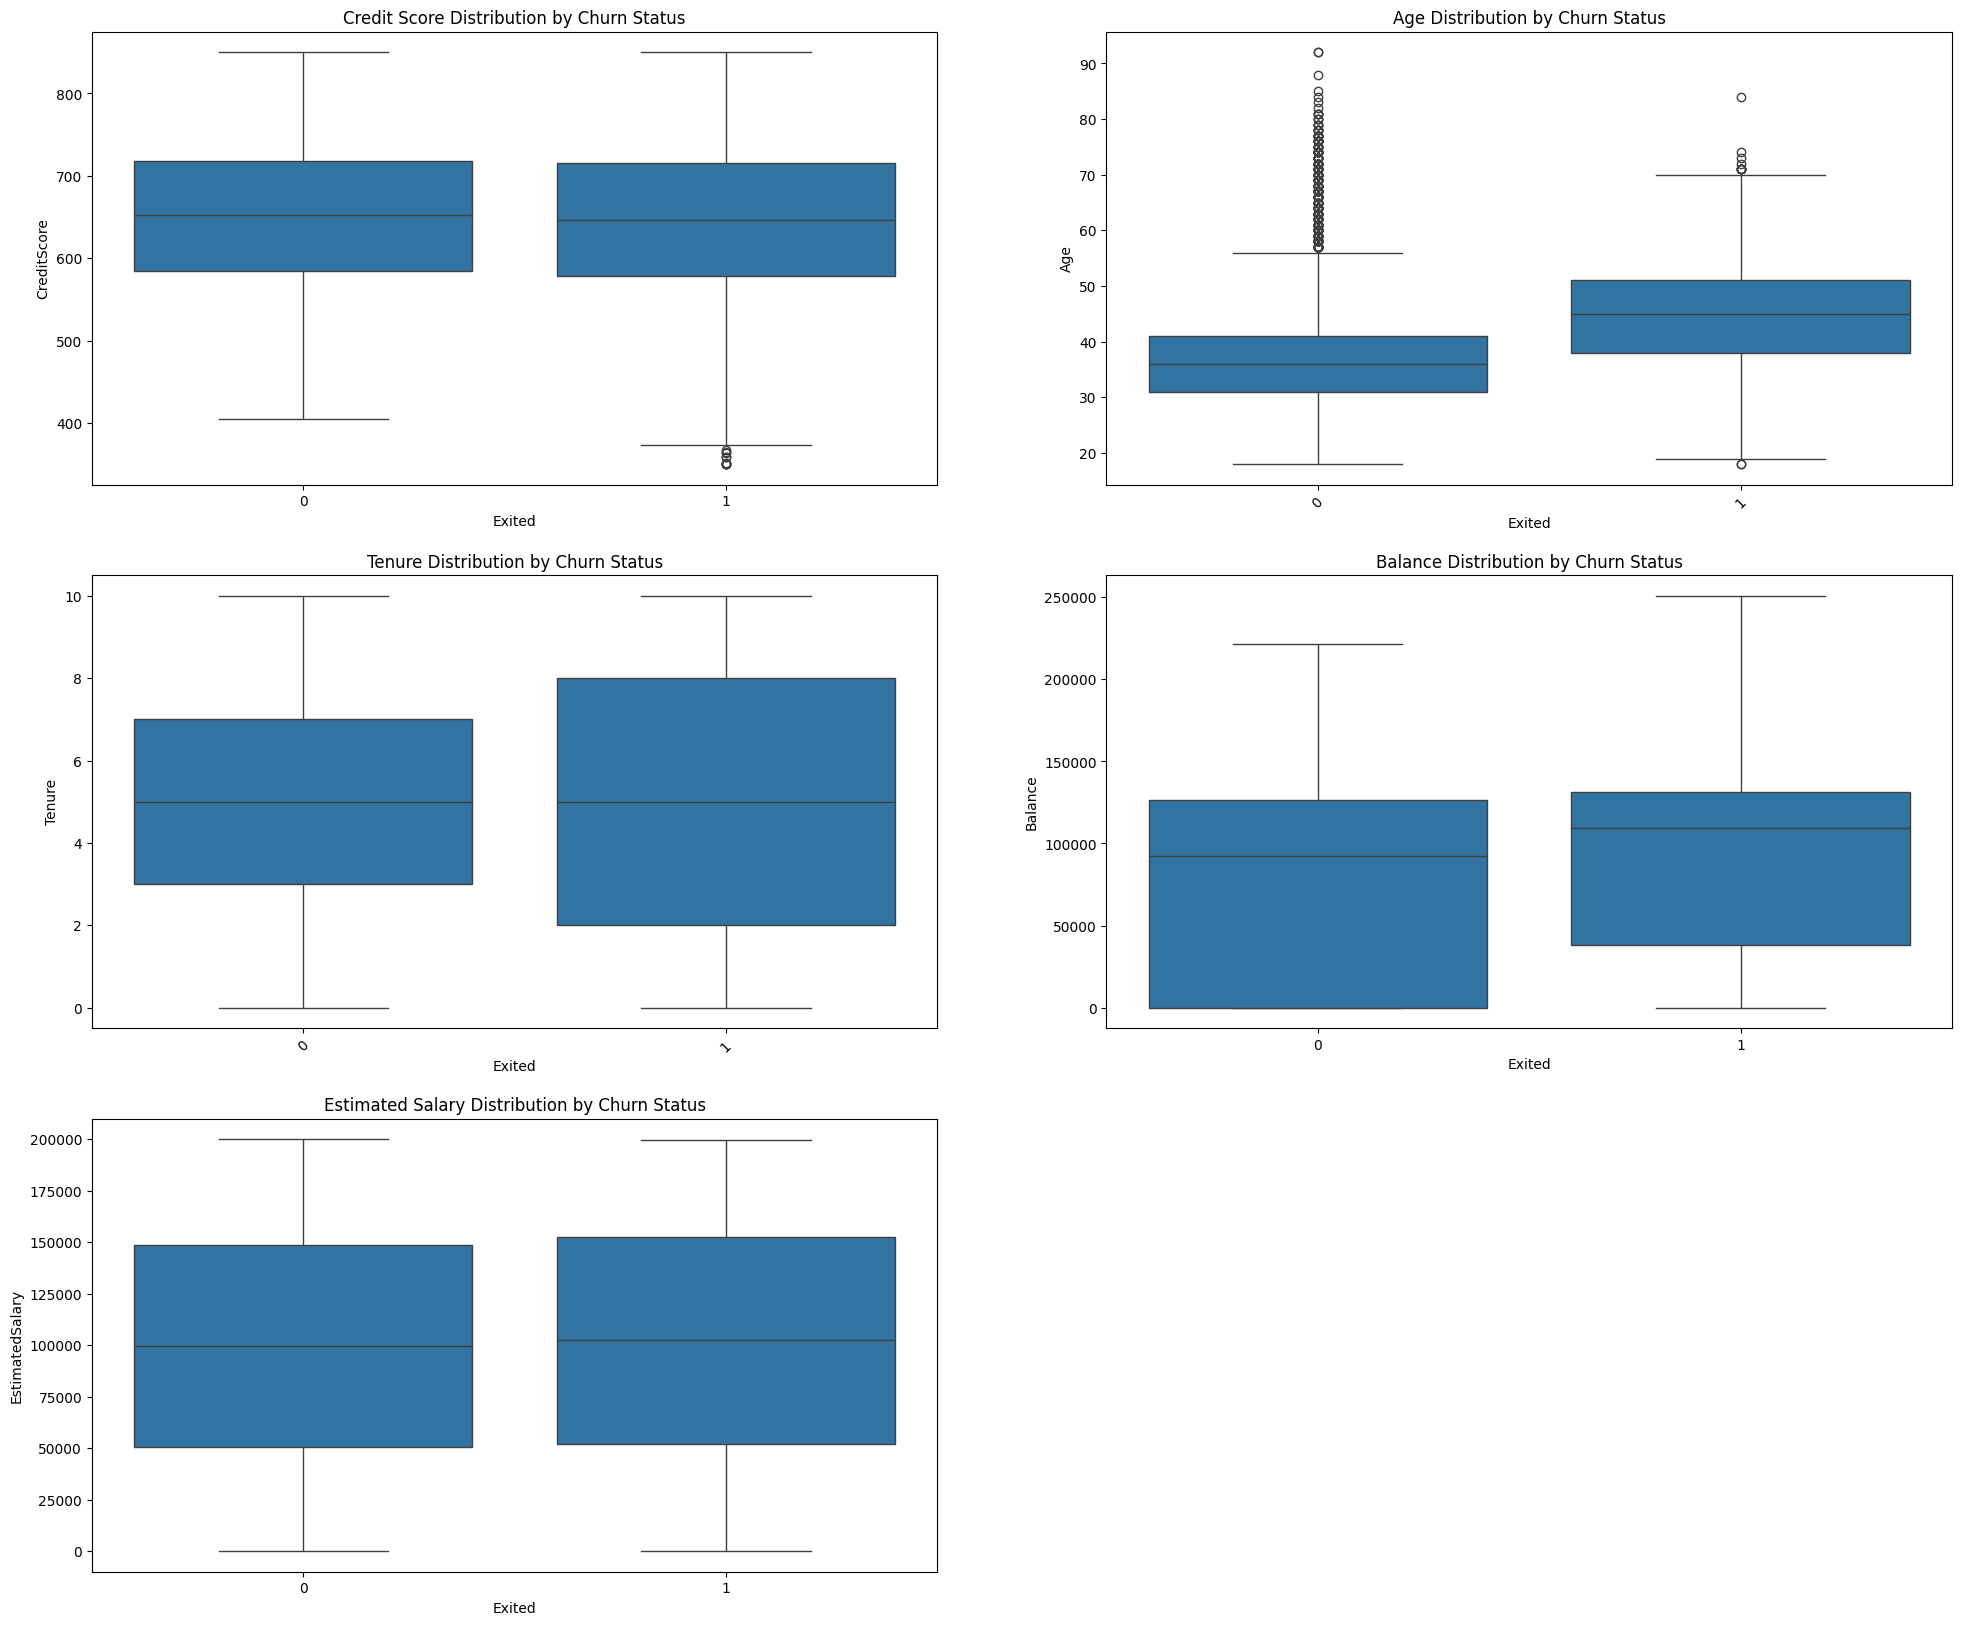

In [10]:
print("Observing independent variables based on the Exited Column:")

fig, axes = plt.subplots(3,2, figsize=(24,20))

sns.boxplot(data=df, y='CreditScore', x ='Exited',  ax=axes[0,0])
axes[0,0].set_title('Credit Score Distribution by Churn Status')

sns.boxplot(data=df, y='Age', x ='Exited', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Churn Status')
axes[0,1].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, y='Tenure', x ='Exited', ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn Status')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, y='Balance', x ='Exited', ax=axes[1,1])
axes[1,1].set_title('Balance Distribution by Churn Status')

sns.boxplot(data=df, y='EstimatedSalary', x= 'Exited', ax=axes[2,0])
axes[2,0].set_title('Estimated Salary Distribution by Churn Status')

axes[2,1].axis('off')
plt.show()

#### Observation:

The credit score distribution between customers who churned and those who did not churn is similar, indicating that the credit score may not be a strong predictor of churn.

The tenure distribution suggests that customers with a shorter tenure are slightly more likely to churn than those with a longer tenure.

Age distribution shows a more pronounced difference - older customers appear more likely to churn than younger ones.

Lastly, the balance distribution is significantly different, with churned customers having higher balances on average. This could indicate that customers with higher balances are at a higher risk of churn.

The estimated salary distribution does not show a stark difference between the churned and retained customers, suggesting that salary may not be a primary factor in the decision to churn.

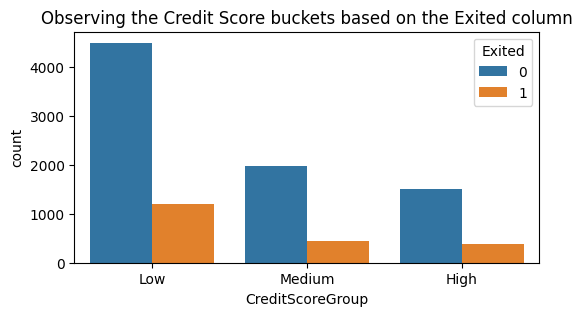

In [11]:
bins = [0,669,739,850]
labels = ['Low','Medium','High']

df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(6,3))
sns.countplot(x = 'CreditScoreGroup', hue = 'Exited', data = df)
plt.title('Observing the Credit Score buckets based on the Exited column')
plt.show()

#### Observation:

Majority of customers who churned are in the 'High' credit score group, suggesting that credit score might have some influence on churn, albeit not a straightforward one

## Feature Engineering

### *Exploring the relationship between features*

a. **Credit Utilization**: Ratio of balance to credit score. It can give an insight into how much of the available credit the customer is using

b. **Interaction Score**: A composite score based on the number of products, active membership, and credit card possession which can give a holistic view of a customer's engagement with the bank. Higher engagement levels might be associated with lower churn rates

c. **Balance To Salary Ratio**: Ratio of the customer's balance to their estimated salary. This feature can indicate how significant the customer's balance is in relation to their income

d. **Credit Score Age Interaction**: An interaction term between credit score and age to explore if the impact of credit score on churn varies across different age groups

In [12]:
df['CreditUtilization']=df['Balance']/df['CreditScore']

df['InteractionScore']=df['NumOfProducts']+df['HasCrCard']+df['IsActiveMember']

df['BalanceToSalaryRatio']=df['Balance']/df['EstimatedSalary']

df['CreditScoreAgeInteraction']=df['CreditScore']*df['Age']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   RowNumber                  10000 non-null  int64   
 1   CustomerId                 10000 non-null  int64   
 2   Surname                    10000 non-null  object  
 3   CreditScore                10000 non-null  int64   
 4   Geography                  10000 non-null  object  
 5   Gender                     10000 non-null  object  
 6   Age                        10000 non-null  int64   
 7   Tenure                     10000 non-null  int64   
 8   Balance                    10000 non-null  float64 
 9   NumOfProducts              10000 non-null  int64   
 10  HasCrCard                  10000 non-null  int64   
 11  IsActiveMember             10000 non-null  int64   
 12  EstimatedSalary            10000 non-null  float64 
 13  Exited                     10000

In [14]:
cat_col = ['Geography','Gender','CreditScoreGroup']

print("Observing the categorical column disribution before encoding: \n")
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution before encoding: 

Geography 

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Gender 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 

CreditScoreGroup 

CreditScoreGroup
Low       5693
Medium    2428
High      1879
Name: count, dtype: int64 



In [15]:
encoder = LabelEncoder()

for columns in cat_col:
    df[columns] = encoder.fit_transform(df[columns])

print("Observing the categorical column disribution after encoding: \n")    
for columns in cat_col:
    print(columns, '\n')
    print(df[columns].value_counts(),'\n')

Observing the categorical column disribution after encoding: 

Geography 

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64 

Gender 

Gender
1    5457
0    4543
Name: count, dtype: int64 

CreditScoreGroup 

CreditScoreGroup
1    5693
2    2428
0    1879
Name: count, dtype: int64 



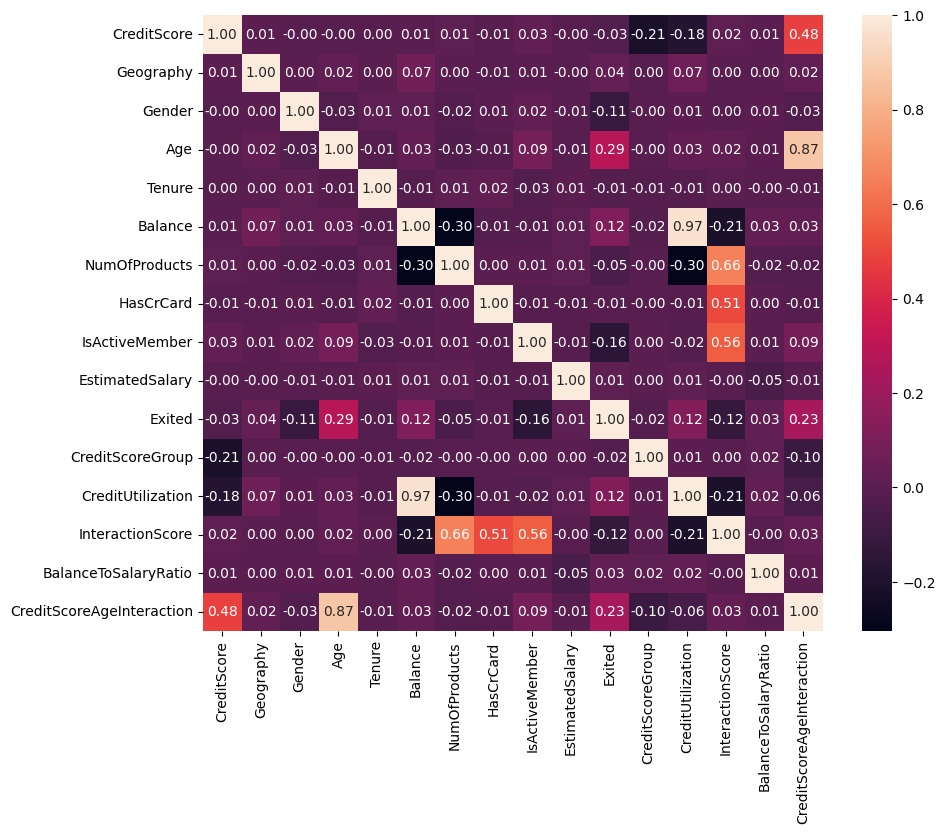

In [16]:
plt.figure(figsize = (10,8))
sns.heatmap(df.drop(['RowNumber','CustomerId','Surname'],axis=1).corr(), annot=True, fmt='.2f')
plt.show()

#### Observations:

Notable correlations include a moderate positive relationship between Age and Exited, suggesting older customers are more likely to churn, and a strong positive relationship between Balance and CreditUtilization, which is intuitive as higher balances would likely increase credit utilization rates

In [17]:
correlation_matrix = df.drop(['RowNumber','CustomerId','Surname'],axis=1).corr()
target_correlations = correlation_matrix['Exited']
print(target_correlations)

CreditScore                 -0.027094
Geography                    0.035943
Gender                      -0.106512
Age                          0.285323
Tenure                      -0.014001
Balance                      0.118533
NumOfProducts               -0.047820
HasCrCard                   -0.007138
IsActiveMember              -0.156128
EstimatedSalary              0.012097
Exited                       1.000000
CreditScoreGroup            -0.015123
CreditUtilization            0.121692
InteractionScore            -0.122148
BalanceToSalaryRatio         0.025558
CreditScoreAgeInteraction    0.232030
Name: Exited, dtype: float64


#### Observation:

1. Age shows a moderately positive correlation, suggesting older customers are more likely to churn 
2. IsActiveMember has a negative correlation, indicating that active members are less likely to churn
3. High CreditUtilization and NumOfProducts also appear to be associated with a higher likelihood of churning

## Modeling

In [18]:
col_drop = ['Exited','RowNumber','CustomerId','Surname']
X = df.drop(col_drop, axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaling_columns = ['Age','CreditScore','Balance','EstimatedSalary','CreditUtilization','BalanceToSalaryRatio','CreditScoreAgeInteraction']

scaler = StandardScaler()
scaler.fit(X_train[scaling_columns])

X_train[scaling_columns] = scaler.transform(X_train[scaling_columns])
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])

In [19]:
print("Training dataset shape:", X_train.shape, y_train.shape)
print("Test dataset shape:",X_test.shape, y_test.shape)

Training dataset shape: (7000, 15) (7000,)
Test dataset shape: (3000, 15) (3000,)


In [20]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'K-Nearest Neighbors': make_pipeline_imb(SMOTE(random_state=42), KNeighborsClassifier()),
    'Support Vector Machine': make_pipeline_imb(SMOTE(random_state=42), SVC(probability=True, random_state=42)),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

# Initialize results DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall Score', 'F1 Score', 'ROC AUC Score'])

# Loop through each model
for name, model in models.items():
    print(f"Model: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Print classification report and confusion matrix
    print(classification_report(y_test, y_pred), '\n')
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred), '\n')
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred)
    
    # Compute ROC AUC Score if applicable
    roc_auc = None
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Print results
    print(f"Accuracy Score: {accuracy}")
    print(f"Recall Score: {recall}")
    print(f"F1 Score: {f1}")
    if roc_auc is not None:
        print(f"ROC AUC Score: {roc_auc}")
    
    # Append results to DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([{
        'Model': name, 
        'Accuracy': accuracy, 
        'Recall Score': recall, 
        'F1 Score': f1, 
        'ROC AUC Score': roc_auc
    }])], ignore_index=True)
    
    print("-" * 50, '\n')

# Display final results
print(results_df)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      2416
           1       0.36      0.68      0.47       584

    accuracy                           0.70      3000
   macro avg       0.63      0.70      0.63      3000
weighted avg       0.80      0.70      0.73      3000
 

Confusion Matrix:
[[1712  704]
 [ 185  399]] 

Accuracy Score: 0.7036666666666667
Recall Score: 0.6832191780821918
F1 Score: 0.4730290456431535
ROC AUC Score: 0.7640820613716774
-------------------------------------------------- 

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2416
           1       0.42      0.67      0.51       584

    accuracy                           0.75      3000
   macro avg       0.66      0.72      0.67      3000
weighted avg       0.81      0.75      0.77      3000
 

Confusion Matrix:
[[1867  549]
 [ 194  390]] 

Accuracy S

In [21]:
results_df

,Model,Accuracy,Recall Score,F1 Score,ROC AUC Score
0,Logistic Regression,0.703667,0.683219,0.473029,0.764082
1,K-Nearest Neighbors,0.752333,0.667808,0.512147,0.776639
2,Support Vector Machine,0.785667,0.662671,0.546224,0.822500
3,DecisionTreeClassifier,0.787667,0.474315,0.465155,0.668863


🔍 Tuning Logistic Regression...
✅ Best Parameters for Logistic Regression: {'C': 0.01}

🔍 Tuning K-Nearest Neighbors...
✅ Best Parameters for K-Nearest Neighbors: {'kneighborsclassifier__n_neighbors': 7}

🔍 Tuning Support Vector Machine...
✅ Best Parameters for Support Vector Machine: {'svc__C': 10, 'svc__kernel': 'rbf'}

🔍 Tuning DecisionTreeClassifier...
✅ Best Parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

Evaluating Model: Logistic Regression


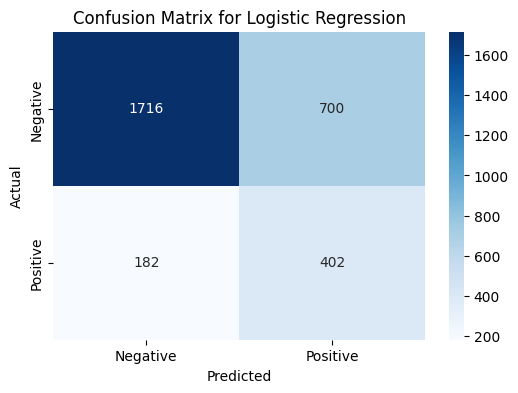

Evaluating Model: K-Nearest Neighbors


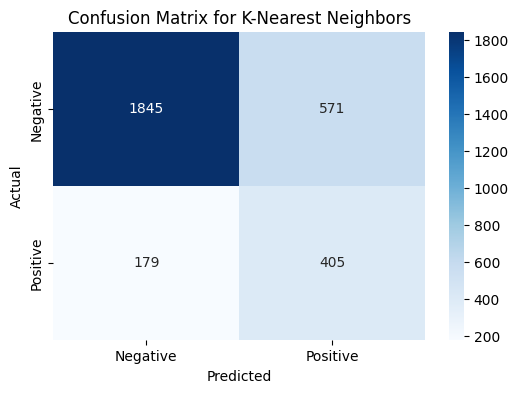

Evaluating Model: Support Vector Machine


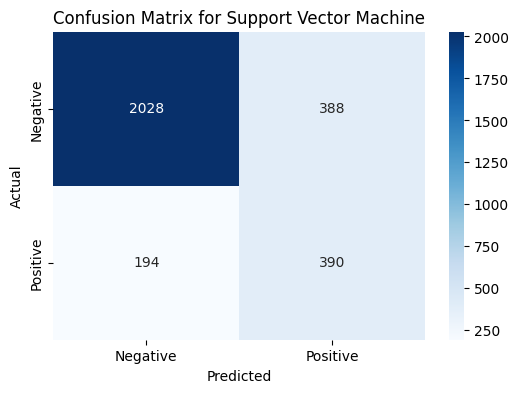

Evaluating Model: DecisionTreeClassifier


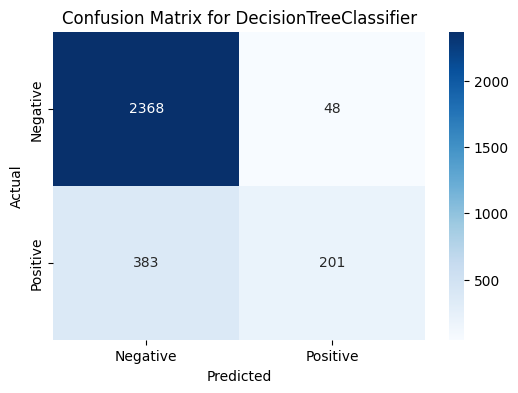


🔹 Final Evaluation Metrics 🔹
                    Model  Accuracy  Precision    Recall  F1 Score  \
0     Logistic Regression  0.706000   0.364791  0.688356  0.476868   
1     K-Nearest Neighbors  0.750000   0.414959  0.693493  0.519231   
2  Support Vector Machine  0.806000   0.501285  0.667808  0.572687   
3  DecisionTreeClassifier  0.856333   0.807229  0.344178  0.482593   

   ROC AUC Score  
0       0.765052  
1       0.787821  
2       0.835844  
3       0.820210  
-------------------------------------------------- 

-------------------------------------------------- 

                    Model  Accuracy  Precision    Recall  F1 Score  \
0     Logistic Regression  0.706000   0.364791  0.688356  0.476868   
1     K-Nearest Neighbors  0.750000   0.414959  0.693493  0.519231   
2  Support Vector Machine  0.806000   0.501285  0.667808  0.572687   
3  DecisionTreeClassifier  0.856333   0.807229  0.344178  0.482593   

   ROC AUC Score  
0       0.765052  
1       0.787821  
2       0.

In [22]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

param_grid = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'K-Nearest Neighbors': {'kneighborsclassifier__n_neighbors': [3, 5, 7]},
    'Support Vector Machine': {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']},
    'DecisionTreeClassifier': {
        "criterion": ["gini", "entropy", "log_loss"],
        "splitter": ["best", "random"],
        "max_depth": [3, 4, 5, 6]
    }
}

# Ensure best_models is initialized
best_models = {}

# Run Hyperparameter Tuning
for name, model in models.items():
    print(f"🔍 Tuning {name}...")
    
    search = GridSearchCV(model, param_grid.get(name, {}), cv=3, scoring='f1', n_jobs=-1)
    search.fit(X_train, y_train)
    
    best_models[name] = search.best_estimator_
    print(f"✅ Best Parameters for {name}: {search.best_params_}\n")



### Evaluating All Models

# Initialize DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 
                                   'ROC AUC Score'])

# Ensure best_models is used correctly
if not best_models:
    print("❌ Error: No best models found. Ensure hyperparameter tuning is completed.")

else:
    for name, model in best_models.items():
        print(f"Evaluating Model: {name}")
        
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, pos_label=1)
        recall = recall_score(y_test, y_pred, pos_label=1)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        results_df = pd.concat([results_df, pd.DataFrame([{
            'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 
            'F1 Score': f1, 'ROC AUC Score': roc_auc
        }])], ignore_index=True)

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

    print("\n🔹 Final Evaluation Metrics 🔹")
    print(results_df)

        # Display confusion matrix


    print("-" * 50, '\n')

    print("-" * 50, '\n')

# Display final results
print(results_df)

In [23]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Logistic Regression,0.706000,0.364791,0.688356,0.476868,0.765052
1,K-Nearest Neighbors,0.750000,0.414959,0.693493,0.519231,0.787821
2,Support Vector Machine,0.806000,0.501285,0.667808,0.572687,0.835844
3,DecisionTreeClassifier,0.856333,0.807229,0.344178,0.482593,0.820210


In [24]:
import numpy as np

# Extended results DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC AUC Score'])

for name, model in best_models.items():
    print(f"Evaluating Model: {name}")
    
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results_df = pd.concat([results_df, pd.DataFrame([{
        'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 
        'F1 Score': f1, 'ROC AUC Score': roc_auc
    }])], ignore_index=True)

print("\n🔹 Final Evaluation Metrics 🔹")
print(results_df)


Evaluating Model: Logistic Regression
Evaluating Model: K-Nearest Neighbors
Evaluating Model: Support Vector Machine
Evaluating Model: DecisionTreeClassifier

🔹 Final Evaluation Metrics 🔹
                    Model  Accuracy  Precision    Recall  F1 Score  \
0     Logistic Regression  0.706000   0.364791  0.688356  0.476868   
1     K-Nearest Neighbors  0.750000   0.414959  0.693493  0.519231   
2  Support Vector Machine  0.806000   0.501285  0.667808  0.572687   
3  DecisionTreeClassifier  0.856333   0.807229  0.344178  0.482593   

   ROC AUC Score  
0       0.765052  
1       0.787821  
2       0.835844  
3       0.820210  


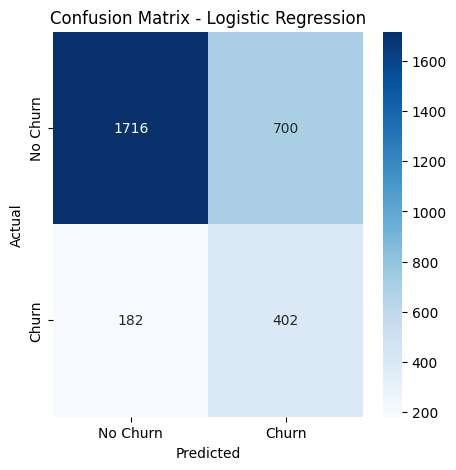

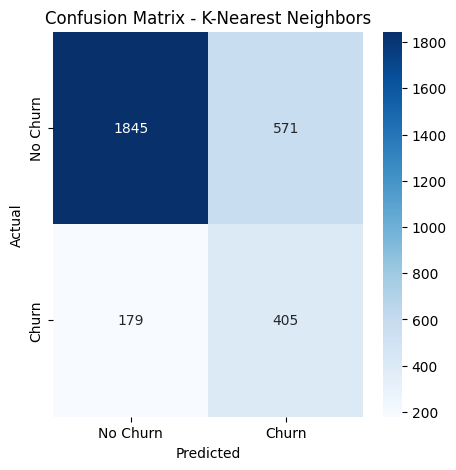

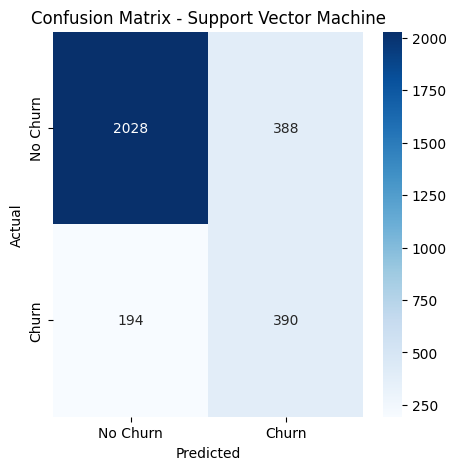

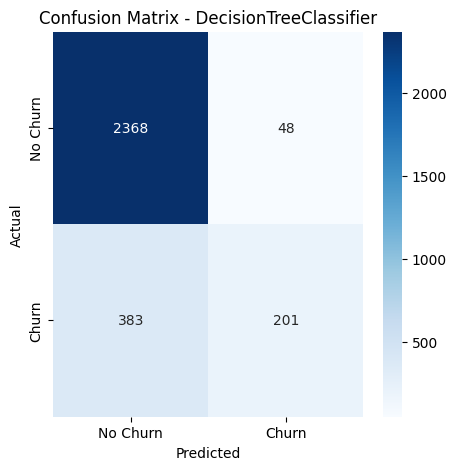

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# ROC Curve
# from sklearn.metrics import roc_curve, auc

# def plot_roc_curve(model, X_test, y_test, name):
#     if hasattr(model, "predict_proba"):
#         y_proba = model.predict_proba(X_test)[:, 1]
#         fpr, tpr, _ = roc_curve(y_test, y_proba)
#         roc_auc = auc(fpr, tpr)
        
#         plt.figure(figsize=(6,6))
#         plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
#         plt.plot([0, 1], [0, 1], 'k--')
#         plt.xlabel("False Positive Rate")
#         plt.ylabel("True Positive Rate")
#         plt.title(f"ROC Curve - {name}")
#         plt.legend()
#         plt.show()

# Run visualization for best models
for name, model in best_models.items():
    plot_confusion_matrix(model, X_test, y_test, name)
    # plot_roc_curve(model, X_test, y_test, name)
